In [1]:
# basic
import numpy as np
import pandas as pd

# get data
# ! conda install pandas-datareader s
import pandas_datareader as pdr

# visual
# ! pip install mpl-finance
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
#import seaborn as sns

#time
import datetime as datetime

# https://github.com/mrjbq7/ta-lib
# ! pip install ta-lib 
import talib

In [2]:
start_date = datetime.datetime(2018,1,1)     #開始日期
end_date= datetime.datetime(2018,12,31)      #結束日期

In [3]:
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start_date ,end=end_date)   # 台灣台積電
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,232.5,231.0,231.5,232.5,18055269.0,224.324173
2018-01-03,238.0,235.5,236.0,237.0,29308091.0,228.665939
2018-01-04,240.0,236.5,240.0,239.5,29096613.0,231.078018
2018-01-05,240.0,238.0,240.0,240.0,22438255.0,231.560440
2018-01-08,242.5,240.5,242.0,242.0,20233692.0,233.490112


In [4]:
df_2330['Date']=df_2330.index             # index 複製到另一欄
df_2330 = df_2330.reset_index(drop=True)  # index變成 0~N
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close,Date
0,232.5,231.0,231.5,232.5,18055269.0,224.324173,2018-01-02
1,238.0,235.5,236.0,237.0,29308091.0,228.665939,2018-01-03
2,240.0,236.5,240.0,239.5,29096613.0,231.078018,2018-01-04
3,240.0,238.0,240.0,240.0,22438255.0,231.560440,2018-01-05
4,242.5,240.5,242.0,242.0,20233692.0,233.490112,2018-01-08


In [5]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)  # 10日均線
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)  # 30日均線
df_2330['sma_10'] = sma_10
df_2330['sma_30'] = sma_30
df_2330[30:40]

,High,Low,Open,Close,Volume,Adj Close,Date,sma_10,sma_30
30,244.5,242.0,244.5,242.5,71504174.0,233.972534,2018-02-21,245.60,246.716667
31,244.0,239.0,244.0,239.5,39239993.0,231.078018,2018-02-22,244.05,246.800000
32,245.0,241.0,241.0,245.0,26985776.0,236.384613,2018-02-23,242.60,246.983333
33,247.5,245.0,247.0,246.5,35901810.0,237.831863,2018-02-26,241.30,247.200000
34,250.5,246.0,250.5,246.0,40818119.0,237.349457,2018-02-27,240.60,247.333333
35,245.0,242.0,244.0,243.0,39719984.0,234.454941,2018-03-01,241.00,247.366667
36,241.0,238.5,240.0,240.0,35139170.0,231.560440,2018-03-02,241.00,247.483333
37,243.0,240.5,242.5,241.5,27337846.0,233.007690,2018-03-05,241.30,247.700000
38,250.0,245.5,245.5,250.0,34890780.0,241.208786,2018-03-06,243.05,248.133333
39,248.5,246.0,248.0,247.0,30391219.0,238.314285,2018-03-07,244.10,248.366667


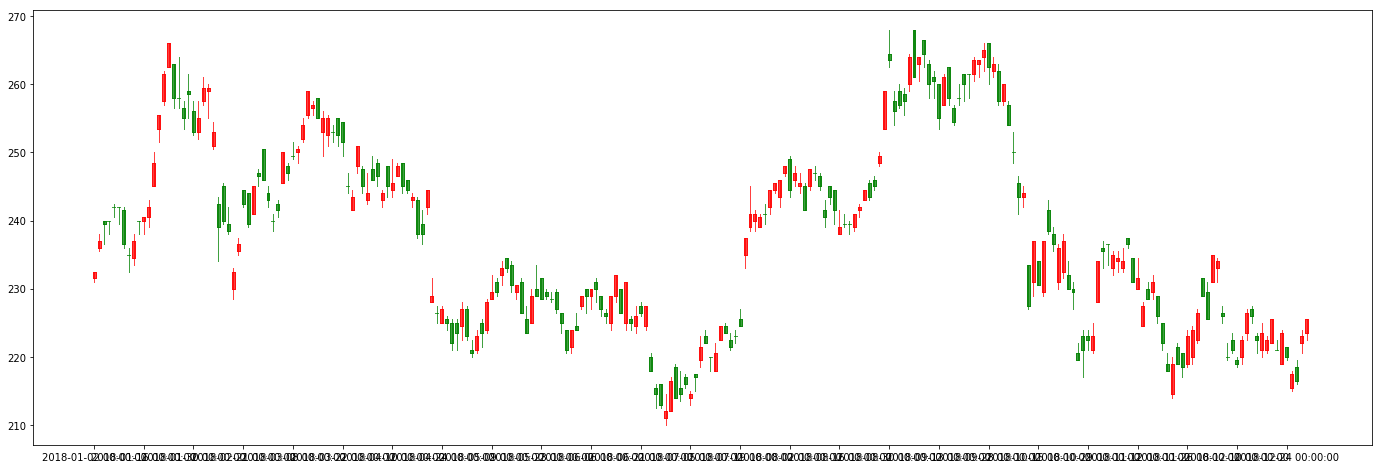

In [6]:
#df_2330.index = df_2330.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330['Date']), 10))
ax.set_xticklabels(df_2330['Date'][::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

/root/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


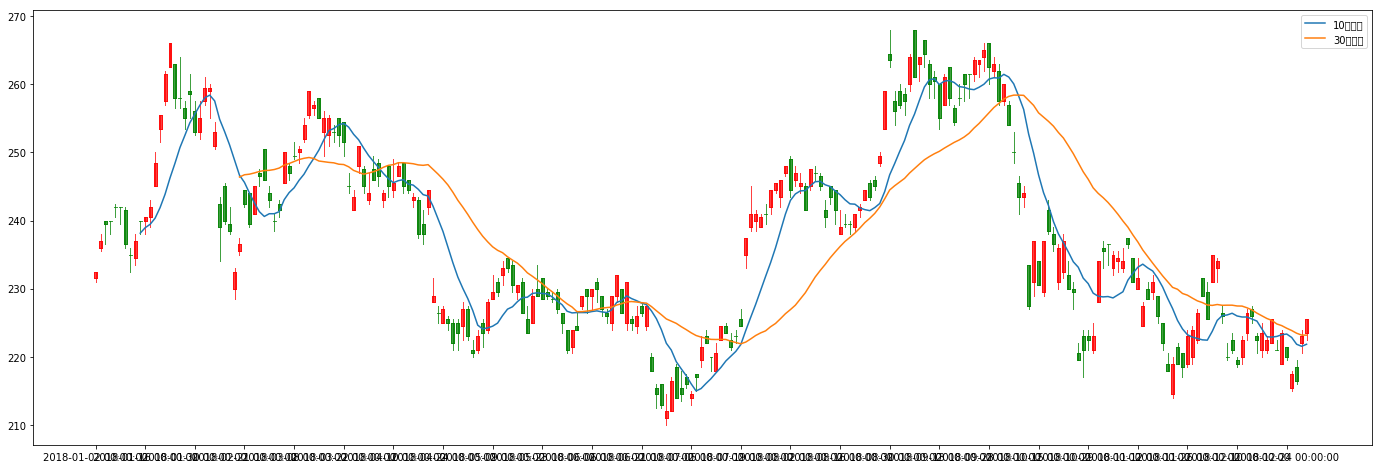

In [7]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)  # 10日均線
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)  # 30日均線

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330['Date']), 10))
ax.set_xticklabels(df_2330['Date'][::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.legend();

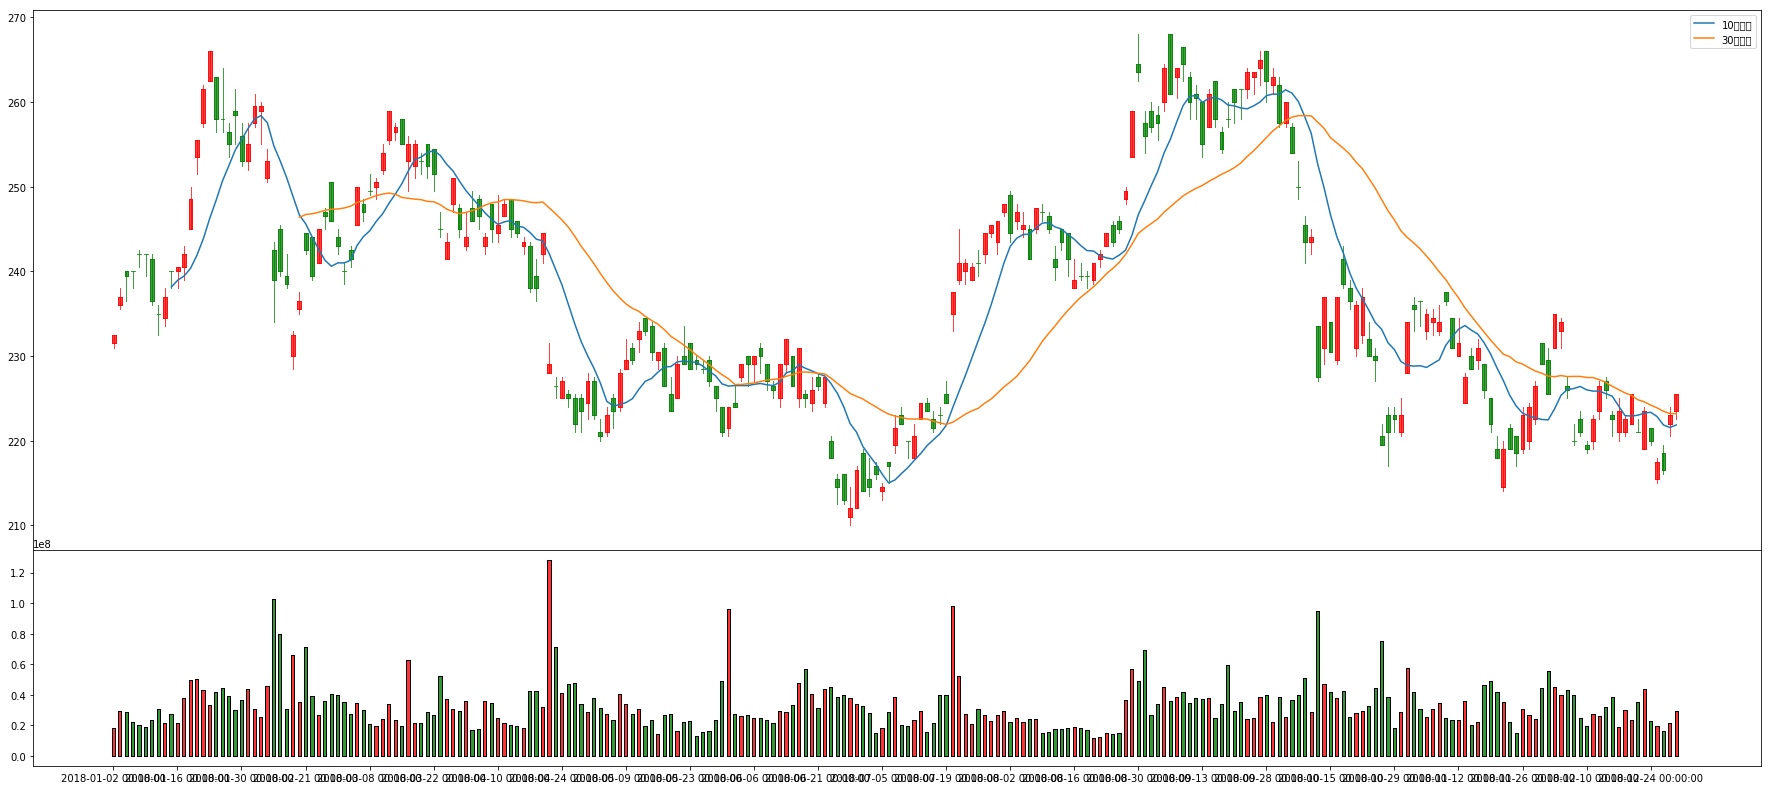

In [8]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330['Date']), 10))
ax2.set_xticklabels(df_2330['Date'][::10])

ax.legend();

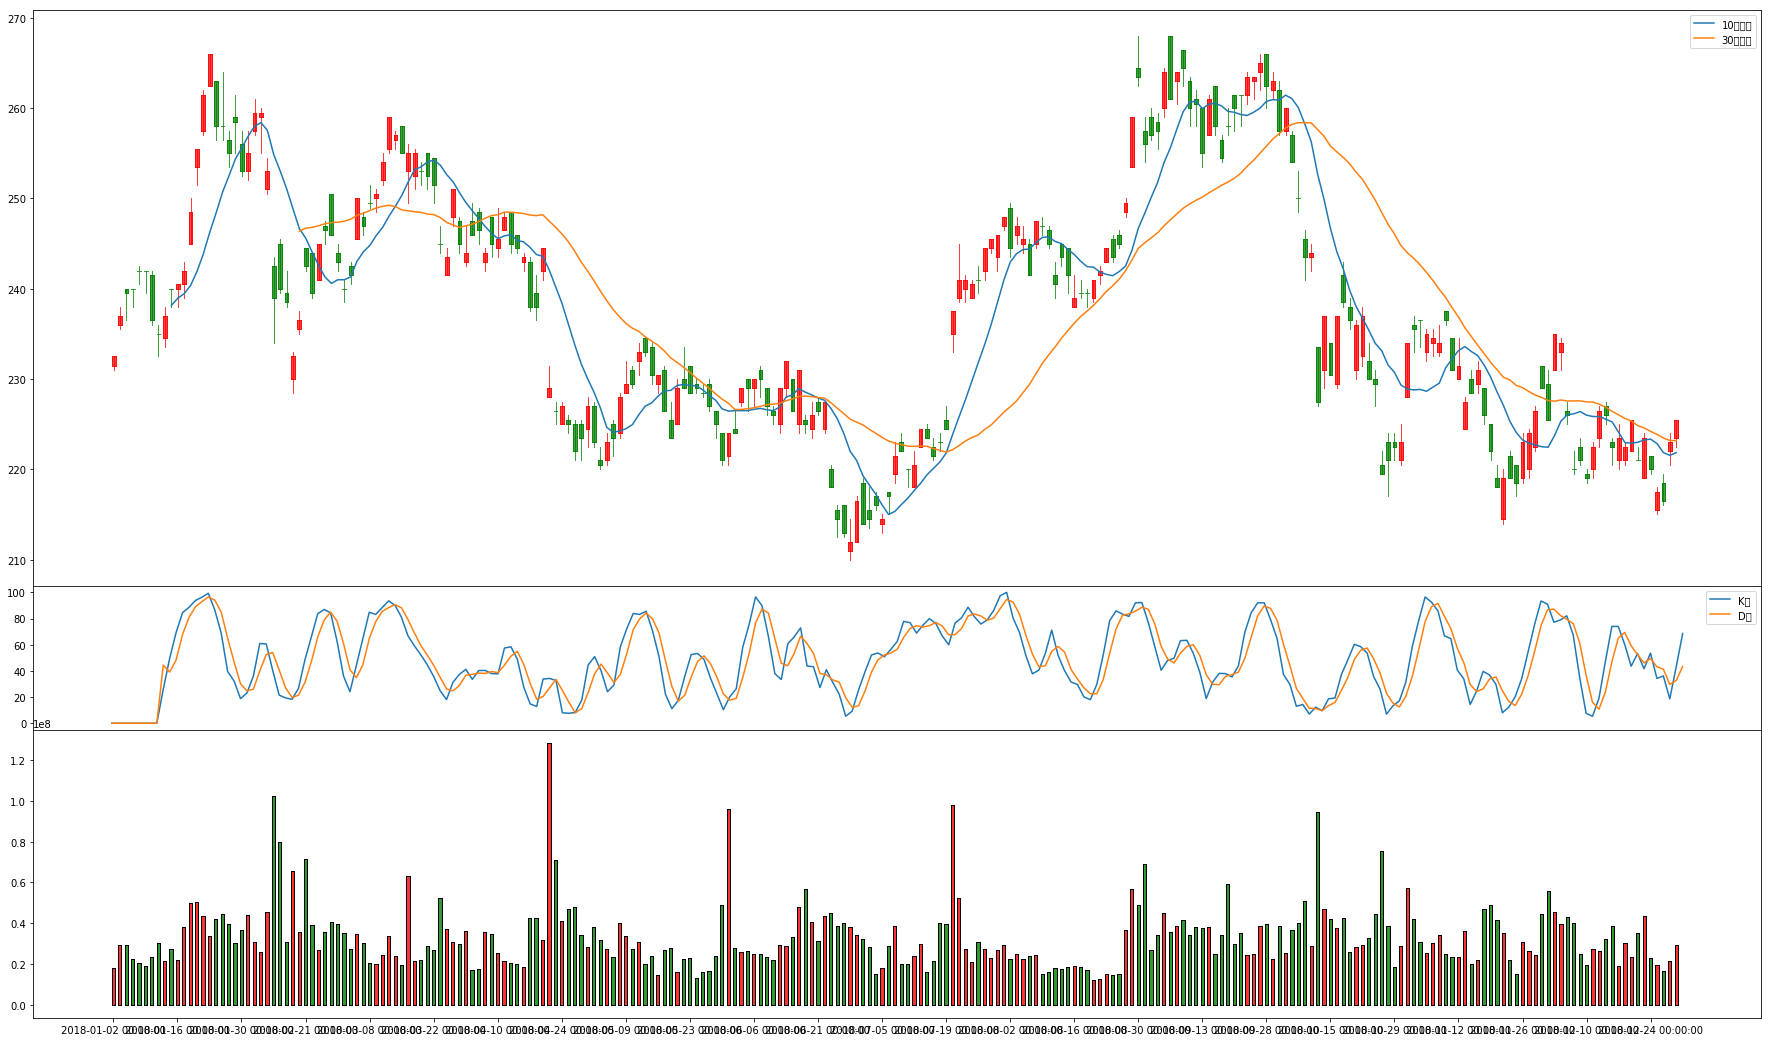

In [9]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])
df_2330['k'].fillna(value=0, inplace=True)
df_2330['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330['Date']), 10))
ax.set_xticklabels(df_2330['Date'][::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df_2330['k'], label='K值')
ax2.plot(df_2330['d'], label='D值')
ax2.set_xticks(range(0, len(df_2330['Date']), 10))
ax2.set_xticklabels(df_2330['Date'][::10])

mpf.volume_overlay(ax3, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_2330['Date']), 10))
ax3.set_xticklabels(df_2330['Date'][::10])

ax.legend();
ax2.legend();

In [10]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])  # k , d 值
df_2330['k'].fillna(value=0, inplace=True)   #NaN 替換成0
df_2330['d'].fillna(value=0, inplace=True)
df_2330[30:40]

,High,Low,Open,Close,Volume,Adj Close,Date,sma_10,sma_30,k,d
30,244.5,242.0,244.5,242.5,71504174.0,233.972534,2018-02-21,245.60,246.716667,48.265460,31.051338
31,244.0,239.0,244.0,239.5,39239993.0,231.078018,2018-02-22,244.05,246.800000,66.053922,46.967697
32,245.0,241.0,241.0,245.0,26985776.0,236.384613,2018-02-23,242.60,246.983333,83.700980,66.006787
33,247.5,245.0,247.0,246.5,35901810.0,237.831863,2018-02-26,241.30,247.200000,86.916667,78.890523
34,250.5,246.0,250.5,246.0,40818119.0,237.349457,2018-02-27,240.60,247.333333,84.289855,84.969167
35,245.0,242.0,244.0,243.0,39719984.0,234.454941,2018-03-01,241.00,247.366667,62.550725,77.919082
36,241.0,238.5,240.0,240.0,35139170.0,231.560440,2018-03-02,241.00,247.483333,36.050725,60.963768
37,243.0,240.5,242.5,241.5,27337846.0,233.007690,2018-03-05,241.30,247.700000,24.094203,40.898551
38,250.0,245.5,245.5,250.0,34890780.0,241.208786,2018-03-06,243.05,248.133333,44.444444,34.863124
39,248.5,246.0,248.0,247.0,30391219.0,238.314285,2018-03-07,244.10,248.366667,64.915459,44.484702


In [11]:
### 兩個均線交叉點

for index, row in df_2330.iterrows():
    try:
        if float(df_2330.loc[index,'sma_30']) > float(df_2330.loc[index,'sma_10']) and float(df_2330.loc[index+1,'sma_30']) < float(df_2330.loc[index+1,'sma_10']):
            print(df_2330.loc[index,'Date'])
        elif float(df_2330.loc[index,'sma_30']) < float(df_2330.loc[index,'sma_10']) and float(df_2330.loc[index+1,'sma_30']) > float(df_2330.loc[index+1,'sma_10']):
            print(df_2330.loc[index,'Date'])
    except:
        continue



2018-02-12 00:00:00
2018-03-13 00:00:00
2018-04-02 00:00:00
2018-06-12 00:00:00
2018-06-20 00:00:00
2018-07-19 00:00:00
2018-10-05 00:00:00
